In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("26-customer_data.csv")

In [7]:
df.head()

,Annual_Income,Spending_Score
0,-5.772478,-4.818216
1,6.768246,-5.424570
2,5.796159,-6.239967
3,7.096022,-5.272612
4,-5.725561,-9.316889


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Annual_Income   1499 non-null   float64
 1   Spending_Score  1499 non-null   float64
dtypes: float64(2)
memory usage: 23.6 KB


<Axes: xlabel='Annual_Income', ylabel='Spending_Score'>

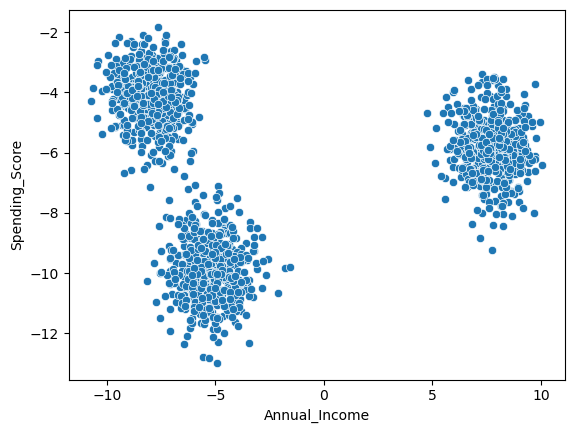

In [11]:
sns.scatterplot(data=df, x="Annual_Income", y="Spending_Score")

In [13]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test = train_test_split(df, test_size =0.2, random_state=15)

In [17]:
X_train

,Annual_Income,Spending_Score
258,7.809992,-5.031123
195,7.769519,-6.059915
817,-8.529586,-4.853877
820,-5.765759,-9.822013
716,-7.932068,-4.882406
...,...,...
667,-6.734875,-5.107626
156,-8.236823,-3.127431
384,-7.744180,-3.563590
645,-6.151325,-9.263209


In [19]:
X_test

,Annual_Income,Spending_Score
513,-5.172436,-11.041683
906,-7.281623,-4.334985
1366,-7.933360,-4.679263
367,7.247201,-4.157474
1392,-5.963997,-9.834777
...,...,...
879,-4.747040,-9.904793
722,-4.886108,-10.754440
557,7.764069,-4.766483
1230,-5.160849,-10.713683


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform (X_train)
X_test_scaled = scaler.transform (X_test)

In [23]:
from sklearn.cluster import KMeans

In [45]:
#elbow method
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters =k, init ="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [47]:
wcss

[196.9206878471016,
 68.44836482219307,
 11.697030239519943,
 9.606167755235422,
 7.882456626546288,
 6.089842499353226,
 5.538766923158217,
 4.996124823656938,
 4.540029487712996,
 4.101305942103225]

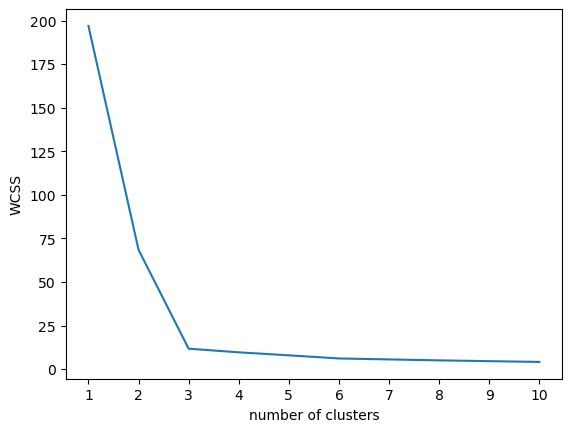

In [55]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel ("number of clusters")
plt.ylabel ("WCSS")
plt.show()

In [ ]:
# kırılım 3' te gerçekleşti küme sayımız 3 olucak.

In [57]:
kmeans =KMeans(n_clusters = 3)

In [59]:
kmeans.fit(X_train_scaled)

KMeans(n_clusters=3)

In [61]:
y_pred=kmeans.predict(X_test_scaled) #hueyu atamak için y_pred kullandık aslında y degişkenimiz yok.

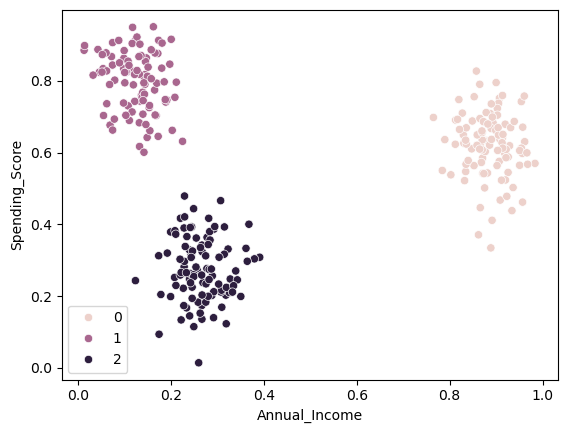

In [63]:
sns.scatterplot(data=pd.DataFrame(X_test_scaled, columns=X_test.columns), x="Annual_Income", y="Spending_Score", hue=y_pred)
plt.show()

In [69]:
# alternatif cluster tespit etme yöntemi

In [71]:
!pip install kneed

In [72]:
from kneed import KneeLocator

In [73]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing") #make sure you specify convex or concave in curve

In [77]:
kl.elbow

3

In [79]:
# silhoutte score
from sklearn.metrics import silhouette_score

In [81]:
silhouette_coefficients=[]
for k in range(2,11): # it needs at least 2 cluster labels so we are not trying 1
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_) 
    silhouette_coefficients.append(score)

In [83]:
silhouette_coefficients

[0.6538372460771634,
 0.7856941696336582,
 0.6400208011797931,
 0.5110353307041757,
 0.5129901851448003,
 0.38171674331994604,
 0.3753948994656511,
 0.33740193720741884,
 0.341366529111516]

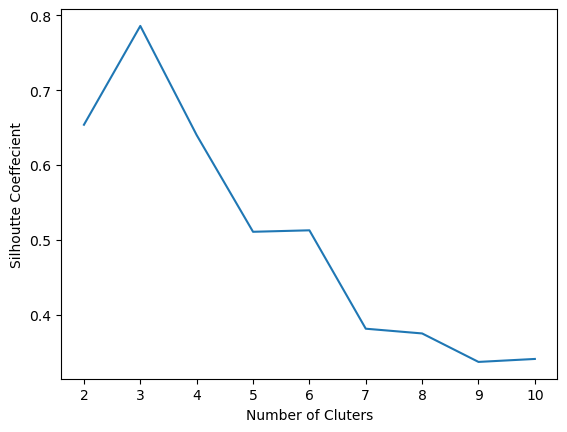

In [87]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()